In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.losses import sparse_categorical_crossentropy
from keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train,y_train),(x_test,y_test)= keras.datasets.fashion_mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

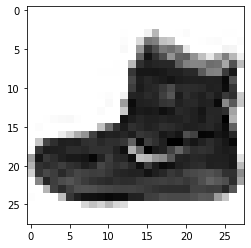

In [ ]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [ ]:
#Normalize the Data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Normalize the data
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
train_Y = to_categorical(y_train)
test_Y = to_categorical(y_test)

In [ ]:
model = keras.models.Sequential([
        keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        #keras.layers.Dropout(0.3),
        #keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        #keras.layers.Dropout(0.3),
        #keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28,28,1)),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Flatten(),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(256, activation='relu'),
        #keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 6, 6, 128)         73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 3, 3, 128)       

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test,y_test)
)

Epoch 1/50
938/938 [==============================] - 11s 11ms/step - loss: 1.3157 - accuracy: 0.5363 - val_loss: 0.7370 - val_accuracy: 0.7216
Epoch 2/50
938/938 [==============================] - 10s 10ms/step - loss: 0.6920 - accuracy: 0.7433 - val_loss: 0.6032 - val_accuracy: 0.7814
Epoch 3/50
938/938 [==============================] - 9s 10ms/step - loss: 0.5921 - accuracy: 0.7785 - val_loss: 0.5478 - val_accuracy: 0.7989
Epoch 4/50
938/938 [==============================] - 9s 10ms/step - loss: 0.5380 - accuracy: 0.8006 - val_loss: 0.5025 - val_accuracy: 0.8184
Epoch 5/50
938/938 [==============================] - 10s 10ms/step - loss: 0.4968 - accuracy: 0.8173 - val_loss: 0.4668 - val_accuracy: 0.8289
Epoch 6/50
938/938 [==============================] - 9s 9ms/step - loss: 0.4681 - accuracy: 0.8296 - val_loss: 0.4537 - val_accuracy: 0.8348
Epoch 7/50
938/938 [==============================] - 9s 10ms/step - loss: 0.4461 - accuracy: 0.8382 - val_loss: 0.4342 - val_accuracy: 0.83

In [ ]:
test_eval = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2621 - accuracy: 0.9029


In [ ]:
print(f'Test Loss:{round(test_eval[0]*100,2)}%')
print(f'Test Accuracy:{round(test_eval[1]*100,2)}%')

Test Loss:26.21%
Test Accuracy:90.29%


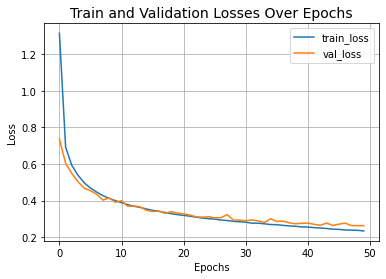

In [ ]:
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [ ]:
model.save('CNNforFMNIST.h5py')

INFO:tensorflow:Assets written to: CNNforFMNIST.h5py/assets


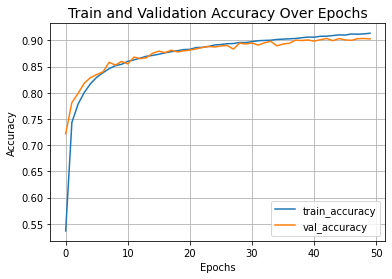

In [ ]:
plt.plot(history.history["accuracy"], label="train_accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train and Validation Accuracy Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [ ]:
import pandas as pd

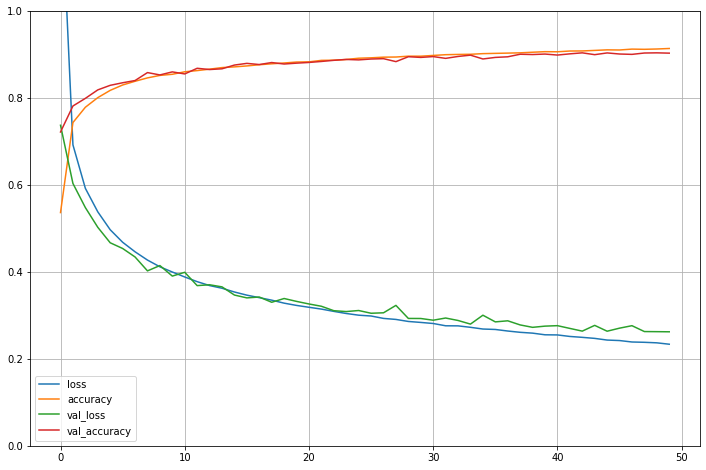

In [ ]:
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid()
plt.gca().set_ylim(0,1)
plt.savefig('CNNfmnist')

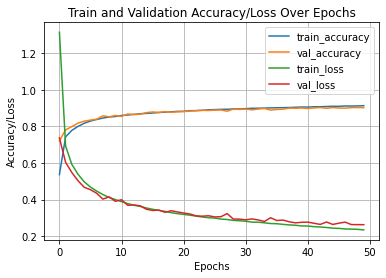

In [ ]:
plt.plot(history.history["accuracy"], label="train_accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy/Loss")
plt.title("Train and Validation Accuracy/Loss Over Epochs", fontsize=12)
plt.legend()
plt.grid()
plt.show()